In [16]:
import os
os.environ["USE_PYGEOS"] = "0"
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt
import rasterio
from shapely.geometry import Point

## Creating a GeoDataFrame from a DataFrame with coordinates

### From longitudes and latitudes


In [4]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

note that points_from_xy() is an enhanced wrapper for [Point(x, y) for x, y in zip(df.Longitude, df.Latitude)]

In [5]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [7]:
gdf.head()

,City,Country,Latitude,Longitude,geometry
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000)


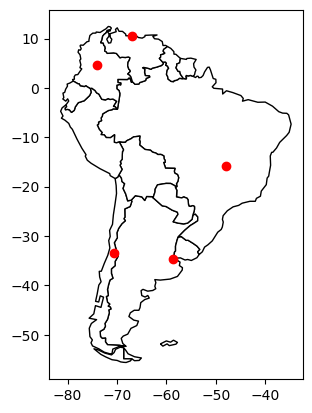

In [8]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

### From WKT format

In [12]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Coordinates': ['POINT(-58.66 -34.58)', 'POINT(-47.91 -15.78)',
                     'POINT(-70.66 -33.45)', 'POINT(-74.08 4.60)',
                     'POINT(-66.86 10.48)']})

In [13]:
df['Coordinates'] = geopandas.GeoSeries.from_wkt(df['Coordinates'])

In [14]:
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')
gdf.head()

,City,Country,Coordinates
0,Buenos Aires,Argentina,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,POINT (-47.91000 -15.78000)
2,Santiago,Chile,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,POINT (-66.86000 10.48000)


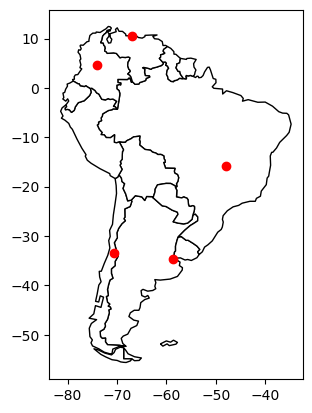

In [15]:
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')

plt.show()